In [6]:
# paths change depending on computer
comp = r'D:\\'
#comp = '/home/mliu' # laptop

# boilerplate imports
import matplotlib.pyplot as plt
import numpy as np
import os
import magno
import circular
from importlib import reload
from neo.io import WinEdrIO
from scipy import stats
%pylab inline

# change working directory to place with all data
path = comp + r'Dropbox\labwork\behavior\magno-fly-data\\'
os.chdir(path)

# fly directory
# unless otherwise stated, each file a different fly, all isoD1
# fly directory
# unless otherwise stated, each file a different fly, all isoD1
desc = ['514_005', #0 14_*: ~4d (Jamie); 5-8: same fly; 5: 10s stim
        '514_006', #1 15s
        '514_007', #2 blank only
        '514_008', #3 30s
        '514_009', #4
        '522_001', #5 22_*: 2d
        '522_003', #6
        '527_003', #7 27_*: 2-4d; 3-4: same fly
        '527_004', #8
        '527_005', #9
        '527_006', #10
        '527_007', #11
        '609_001', #12 all contours
        '610_001', #13 contour program
        '610_004', #14 bars&spots
        '610_006', #15 bars&spots
        '611_001', #16 contours
        '611_003', #17 contours
        '611_005', #18 bars&spots
        '611_006', #19 contours
        '611_008', #20 bars&spots
        '615_002', #21 bars&spots
        '615_003', #22 bars&spots
        '615_004', #23 bars&spots
        '615_005', #24 bars&spots
        '617_002', #25 bars&spots
        '617_004', #26 bars&spots
        '618_001', #27 contours
        '618_002', #28 contours
        '618_003', #29 contours
        '622_001', #30 contours
        '622_002', #31 mbar
        '623_001', #32 contours
        '623_002', #33 contours
        '623_003', #34 contours
        '623_004', #35 contours
        '623_005', #36 mbar
        '624_001', #37 mbar
        '624_003', #38 mbar
        '624_004', #39 mbar
        '624_005' #40 same as above
        ] 

# info for legacy data
old_data = ['150514_005.EDR','150514_006.EDR','150514_008.EDR']
old_stim = {'bar':0,'mbar':2789,'spot':5578,'contour':8368,'grating':-3050,'loom':-6101}
manual_split = {'150514_005': array([ 2828,  3831,  4832,  5835,  6836,  7840,  8842,  9845, 10847]),
 '150514_006': array([ 2663,  4166,  5668,  7170,  8672, 10174, 11677, 13179, 14681,
        16183, 17685, 19186, 20689, 22191, 23694, 25196, 26698, 28200,
        29703, 31205, 32707, 34209, 35710, 37212, 38714, 40217, 41720,
        43223, 44726, 46228, 47730, 49232, 50734, 52236, 53728, 55240,
        56743, 58245, 59747, 61249, 62752, 64254, 65756, 67258, 68767,
        70269, 71772, 73274, 74776, 76278, 77780, 79282, 80786, 82288,
        83791, 85299, 86803, 88305, 89807, 91309, 92811, 94314, 95816,
        97319, 98821]),
 '150514_008': array([ 2766,  5770,  8773, 11776, 14779, 17782, 20787, 23788, 26792,
        29795, 32796, 35799, 38802, 41805, 44808, 47810, 50814, 53817,
        56820, 59823, 62826, 65831, 68837, 71842, 74845, 77848, 80851]),
 '150514_009': array([  2775,   4278,   5780,   7283,   8785,  10288,  11790,  13292,
         14796,  16298,  17802,  19310,  20813,  22316,  23817,  25319,
         26823,  28326,  29826,  31329,  32831,  34334,  35842,  37344,
         38847,  40350,  41852,  43353,  44855,  46357,  47860,  49363,
         50864,  52365,  53869,  55370,  56873,  58375,  59878,  61380,
         62883,  64384,  65887,  67388,  68897,  70401,  71902,  73405,
         74906,  76409,  77911,  79413,  80916,  82418,  83919,  85422,
         86924,  88425,  89927,  91431,  92934,  94437,  95938,  97441,
         98943, 100446, 101953, 103457, 104959, 106461, 107963, 109465,
        110967, 112470, 113972, 115474, 116978, 118487, 119989, 121491,
        122994, 124496, 125998, 127500, 129003, 130506, 132007, 133512,
        135019, 136523, 138025, 139528, 141030, 142533])}

fname = [ '150' + d + '.EDR' for d in desc ]

Populating the interactive namespace from numpy and matplotlib


In [2]:
scriptpath = comp + r'Dropbox\labwork\scripts\magno-fly-analysis\\'
os.chdir(scriptpath)
reload(magno)
path = comp + r'Dropbox\labwork\behavior\magno-fly-data\\'
os.chdir(path)
fly = [ magno.Magno(f) for f in fname ]
for i in range(len(fly)):
    manual = False
    split = []
    if fly[i].basename in manual_split.keys():
        manual = True
        split = manual_split[fly[i].basename]
    
    if fly[i].basename is '150514_007':
        fly[i].open_edr(stim_key={'blank':2},stim_margin=100,manual=True,split=[])
    elif fly[i].basename in old_data:
        fly[i].open_edr(stim_key=old_stim,manual=manual,split=split)
    else:
        fly[i].open_edr(manual=manual,split=split)
        
# combine same flies so that each entry is a unique fly
fly[0].append(fly[1])
fly[0].append(fly[2])
fly[0].append(fly[3])
fly[7].append(fly[8])
fly[39].append(fly[40])

fly = list( fly[i] for i in [0,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39])

Reading in 150514_005...
Reading in 150514_006...
Reading in 150514_007...
Reading in 150514_008...
Reading in 150514_009...
Reading in 150522_001...
Reading in 150522_003...
Reading in 150527_003...
Reading in 150527_004...
Reading in 150527_005...
Reading in 150527_006...
Reading in 150527_007...
Reading in 150609_001...
Reading in 150610_001...
Reading in 150610_004...
Reading in 150610_006...
Reading in 150611_001...
Reading in 150611_003...
Reading in 150611_005...
Reading in 150611_006...
Reading in 150611_008...
Reading in 150615_002...
Reading in 150615_003...
Reading in 150615_004...
Reading in 150615_005...
Reading in 150617_002...
Reading in 150617_004...
Reading in 150618_001...
Reading in 150618_002...
Reading in 150618_003...
Reading in 150622_001...
Reading in 150622_002...
Reading in 150623_001...
Reading in 150623_002...
Reading in 150623_003...
Reading in 150623_004...
Reading in 150623_005...
Reading in 150624_001...
Reading in 150624_003...
Reading in 150624_004...


In [9]:
scriptpath = comp + r'Dropbox\labwork\scripts\magno-fly-analysis\\'
os.chdir(scriptpath)
reload(magno)

<module 'magno' from 'D:\\Dropbox\\labwork\\scripts\\magno-fly-analysis\\magno.py'>

D:\Dropbox\labwork\scripts\magno-fly-analysis\magno.py:619: RuntimeWarning: invalid value encountered in true_divide
  a[j] = a[j] / sum(a[j])
D:\Dropbox\labwork\scripts\magno-fly-analysis\magno.py:621: RuntimeWarning: Mean of empty slice
  img[k,:,:] = np.nanmean(allimg,axis=0)


0.17575088847778922

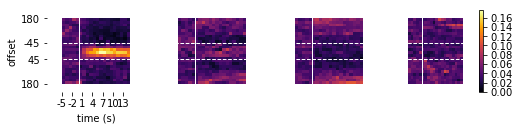

In [28]:
reload(magno)
magno.hist2d_listgrid([fly],vmax=0.17575088847778922,save=True,tend=15,fname='20181031_flies.pdf')

In [25]:
fly[2].shape[1].shape

b'blank'

In [10]:
def calcfix(moz,shapes=[b'bar',b'mbar',b'spot',b'blank'],freq=[0.0,0.1,0.5,1.0],fixrange=45,taft=3,tend=15):
    nrow = len(shapes)*len(freq)
    f = np.empty([len(moz),nrow])
    for m in range(len(moz)):
        for n in range(nrow):
            i = n
            j = 0
            st = magno.shape_parse(moz[m].shape,shape=shapes[i],freq=freq[j],prev=0)
            f[m,n] = np.nanmean([ sum((s.offset > -1*fixrange) & (s.offset < fixrange) & (s.t > taft) & (s.t <= tend))/
           float(sum((s.t > taft) & (s.t <= tend))) for s in st ])
    return np.transpose(f)

def calcantifix(moz,shapes=[b'bar',b'mbar',b'spot',b'blank'],freq=[0.0,0.1,0.5,1.0],fixrange=45,taft=3,tend=15):
    nrow = len(shapes)*len(freq)
    f = np.empty([len(moz),nrow])
    for m in range(len(moz)):
        for n in range(nrow):
            i = n
            j = 0
            st = magno.shape_parse(moz[m].shape,shape=shapes[i],freq=freq[j],prev=0)
            f[m,n] = np.nanmean([ sum((abs(s.offset) > 180-fixrange) & (s.t > taft) & (s.t <= tend))/
           float(sum((s.t > taft) & (s.t <= tend))) for s in st ])
    return np.transpose(f)

def kruskal(fda):
    print(stats.kruskal(*(d for d in fda)).pvalue)
    ntests = 0
    for i in range(len(fda)):
        printstr = ''
        for j in range(i+1,len(fda)):
            printstr = printstr + str(round(stats.mannwhitneyu(fda[i],fda[j],alternative='two-sided').pvalue,4)) + '\t'
            ntests += 1
        print(printstr)
    print(0.05/ntests)
#friedman(fda)

def multiMWU(fa,fb,alpha=0.05):
    n,_ = fa.shape
    ntests = 0
    for i in range(n):
        print(stats.mannwhitneyu(fa[i],fb[i],alternative='two-sided').pvalue)
        ntests += 1
    print('p_adj = '+str(alpha/ntests))

C:\Users\liber\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:986: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


3.35855325586e-07
0.0007	0.0	0.0	
0.0401	0.549	
0.042	

0.008333333333333333


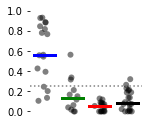

In [7]:
#reload(magno)
flyshapes = calcfix(fly,freq=['all'])
fs_nonan = [ f[~np.isnan(f)] for f in flyshapes ]
kruskal(fs_nonan)
magno.dotplot(fs_nonan,mc='bgrk',pc='k')
fig = plt.gcf()
fig.set_size_inches(2,2)
#plt.savefig('20180818_flies.pdf')

In [138]:
for f in fs_nonan:
    print(len(f))

17
12
16
21


3.50686058815e-07
0.0002	0.0	0.0002	
0.0993	0.0414	
0.0008	

0.008333333333333333


C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


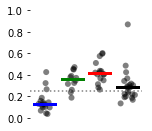

In [13]:
#reload(magno)
flyshapes = calcantifix(fly,freq=['all'])
fs_nonan = [ f[~np.isnan(f)] for f in flyshapes ]
kruskal(fs_nonan)
magno.dotplot(fs_nonan,mc='bgrk',pc='k')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.savefig('20180818_flies_antifix.pdf')

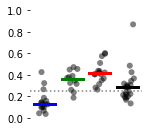

In [14]:
magno.dotplot(fs_nonan,mc='bgrk',pc='k')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.savefig('20180818_flies_antifix.pdf')

In [14]:
for f in fly:
    print(f.basename)

150514_005
150514_009
150522_001
150522_003
150527_003
150527_005
150527_006
150527_007
150609_001
150610_001
150610_004
150610_006
150611_001
150611_003
150611_005
150611_006
150611_008
150615_002
150615_003
150615_004
150615_005
150617_002
150617_004
150618_001
150618_002
150618_003
150622_001
150622_002
150623_001
150623_002
150623_003
150623_004
150623_005
150624_001
150624_003
150624_004


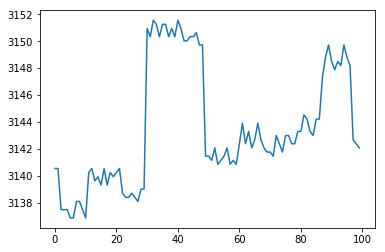

In [4]:
plt.plot(fly[26].edr_raw['orientation'][:100])

In [46]:
def plot_shape_offset(strial):
    f,ax = plt.subplots(2,1,sharex=True)
    f.set_size_inches(6,5)
    ax[0].plot(strial.t,strial.orientation,c='b')
    ax[0].plot(strial.t,strial.xpos,c='g')
    ax[0].set_ylim(0,360)
    ax[1].axhline(0,c='0.5')
    ax[1].plot(strial.t,strial.offset,c='0.25')
    ax[1].set_ylim(-180,180)

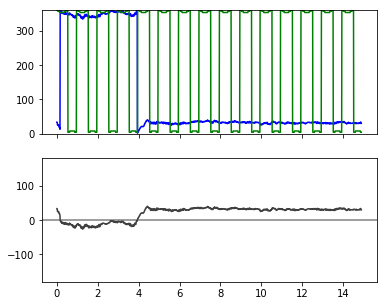

In [49]:
plot_shape_offset(fly[0].shape[11])

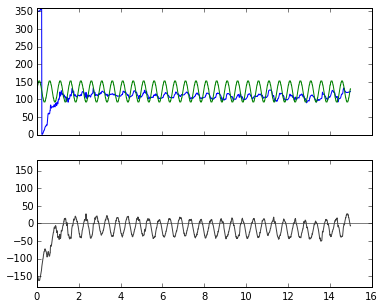

In [35]:
s = np.concatenate([magno.shape_parse(f.shape,'bar') for f in fly])
n = 121
plot_shape_offset(s[n])
plt.savefig('20150918_baroffset.pdf')

In [35]:
magno.see_raw(fly)

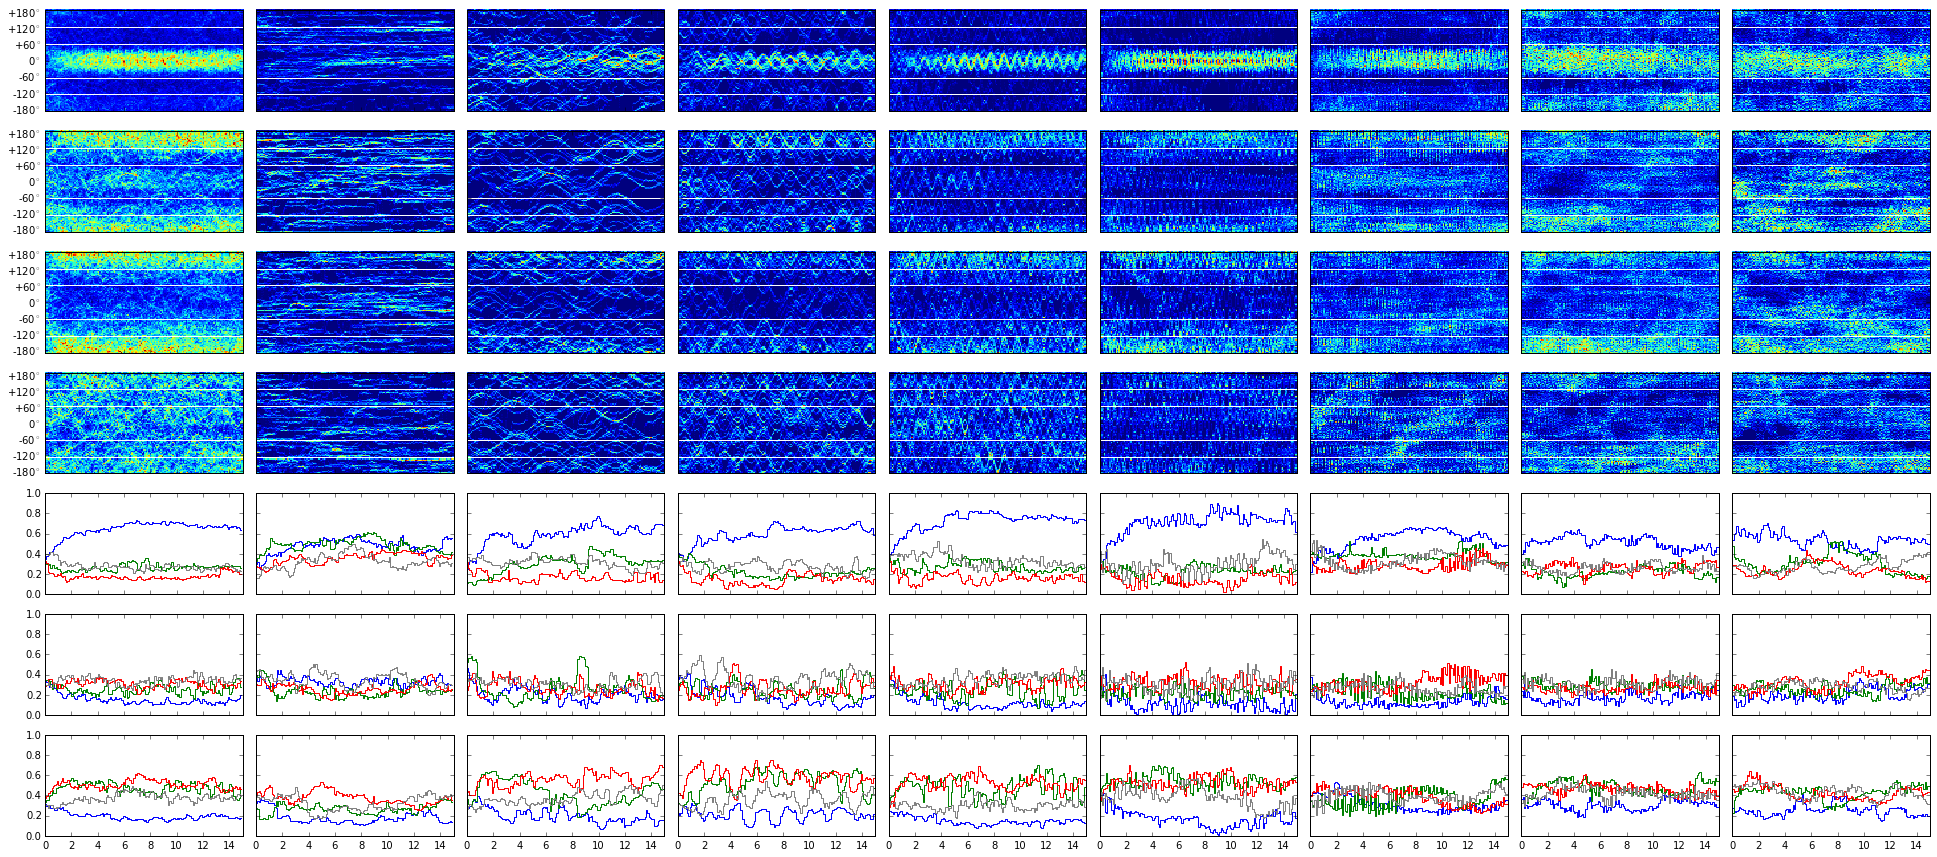

In [34]:
tstep = 0.1
thres = np.pi/3
possible_freq = ['all',0.0,0.2,0.5,1.0,2.0,4.0,6.0,8.0]
#stdthres = [0.5,1,1.5]
#linestyles = ['-','--',':']
f,ax = plt.subplots(7,len(possible_freq),sharex=True,sharey='row')
f.set_size_inches([3*len(possible_freq),12])
for i in range(len(possible_freq)):
    fr = possible_freq[i]
    d = 60
    if fr == 0: d = 0
    _,_ = magno.hist2d_time(fly,'bar',freq=fr,deg=d,ax=ax[0,i])
    _,_ = magno.hist2d_time(fly,'mbar',freq=fr,deg=d,ax=ax[1,i])
    _,_ = magno.hist2d_time(fly,'spot',freq=fr,deg=d,ax=ax[2,i])
    _,_ = magno.hist2d_time(fly,'blank',freq=fr,deg=d,ax=ax[3,i])

    bar_fix,bar_neither,bar_antifix,t = hist_segment(fly,shape='bar',freq=fr,deg=d,tstep=tstep,thres=np.pi/3)
    ax[4,i].plot(t,bar_fix,c='b',drawstyle='steps')
    ax[5,i].plot(t,bar_neither,c='b',drawstyle='steps')
    ax[6,i].plot(t,bar_antifix,c='b',drawstyle='steps')
    ax[0,i].axhline(-np.pi+thres,c='w')
    ax[0,i].axhline(-thres,c='w')
    ax[0,i].axhline(thres,c='w')
    ax[0,i].axhline(np.pi-thres,c='w')
    
    bar_fix,bar_neither,bar_antifix,t = hist_segment(fly,shape='mbar',freq=fr,deg=d,tstep=tstep,thres=np.pi/3)
    ax[4,i].plot(t,bar_fix,c='g',drawstyle='steps')
    ax[5,i].plot(t,bar_neither,c='g',drawstyle='steps')
    ax[6,i].plot(t,bar_antifix,c='g',drawstyle='steps')
    ax[1,i].axhline(-np.pi+thres,c='w')
    ax[1,i].axhline(-thres,c='w')
    ax[1,i].axhline(thres,c='w')
    ax[1,i].axhline(np.pi-thres,c='w')

    spot_fix,spot_neither,spot_antifix,t = hist_segment(fly,shape='spot',freq=fr,deg=d,tstep=tstep,thres=np.pi/3)
    ax[4,i].plot(t,spot_fix,c='r',drawstyle='steps')
    ax[5,i].plot(t,spot_neither,c='r',drawstyle='steps')
    ax[6,i].plot(t,spot_antifix,c='r',drawstyle='steps')
    ax[2,i].axhline(-np.pi+thres,c='w')
    ax[2,i].axhline(-thres,c='w')
    ax[2,i].axhline(thres,c='w')
    ax[2,i].axhline(np.pi-thres,c='w')

    bla_fix,bla_neither,bla_antifix,t = hist_segment(fly,shape='blank',freq=fr,deg=d,tstep=tstep,thres=np.pi/3)
    ax[4,i].plot(t,bla_fix,c='0.5',drawstyle='steps')
    ax[5,i].plot(t,bla_neither,c='0.5',drawstyle='steps')
    ax[6,i].plot(t,bla_antifix,c='0.5',drawstyle='steps')
    ax[3,i].axhline(-np.pi+thres,c='w')
    ax[3,i].axhline(-thres,c='w')
    ax[3,i].axhline(thres,c='w')
    ax[3,i].axhline(np.pi-thres,c='w')
    
    
ax[4,0].set_ylim([0,1])
ax[5,0].set_ylim([0,1])
ax[6,0].set_ylim([0,1])
ax[0,0].set_yticklabels(['-180$^\circ$','-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$'])
ax[1,0].set_yticklabels(['-180$^\circ$','-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$'])
ax[2,0].set_yticklabels(['-180$^\circ$','-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$'])
ax[3,0].set_yticklabels(['-180$^\circ$','-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$'])
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           #ncol=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.savefig('offset-time-latency_20150625.pdf')

In [4]:
def hist_segment(fly,shape='all',freq='all',deg='all',thres=np.pi/3,tstep=0.1):
    tbins = np.arange(0,15+tstep,tstep)
    obins = [-np.pi,-np.pi+thres,-thres,thres,np.pi-thres,np.pi]
    
    fix = np.empty([len(fly),len(tbins)-1])
    antifix = np.empty([len(fly),len(tbins)-1])
    neither = np.empty([len(fly),len(tbins)-1])
    
    for i in range(len(fly)):
        alloff = magno.shape_parse(fly[i].shape,shape=shape,freq=freq,deg=deg)
        if len(alloff)==0:
            fix[i].fill(np.nan)
            antifix[i].fill(np.nan)
            neither[i].fill(np.nan)
        else:
            t = [a.t for a in alloff]
            t = [item for sublist in t for item in sublist]
            offset = [np.radians(a.offset) for a in alloff]
            offset = [item for sublist in offset for item in sublist]
            hist2d = np.histogram2d(t,offset,bins=[tbins,obins])
            fix_i = [ hist2d[0][j][2] for j in range(len(hist2d[0])) ]
            antifix_i = [ hist2d[0][j][0] + hist2d[0][j][4] for j in range(len(hist2d[0])) ]
            neither_i = [ hist2d[0][j][1] + hist2d[0][j][3] for j in range(len(hist2d[0])) ]
            
            total = np.sum(hist2d[0],axis=1)
            fix[i] = fix_i/total
            antifix[i] = antifix_i/total
            neither[i] = neither_i/total
    
    fix_mean = np.nanmean(fix,axis=0)
    antifix_mean = np.nanmean(antifix,axis=0)
    neither_mean = np.nanmean(neither,axis=0)
    
    return fix_mean,neither_mean,antifix_mean,hist2d[1][:-1]

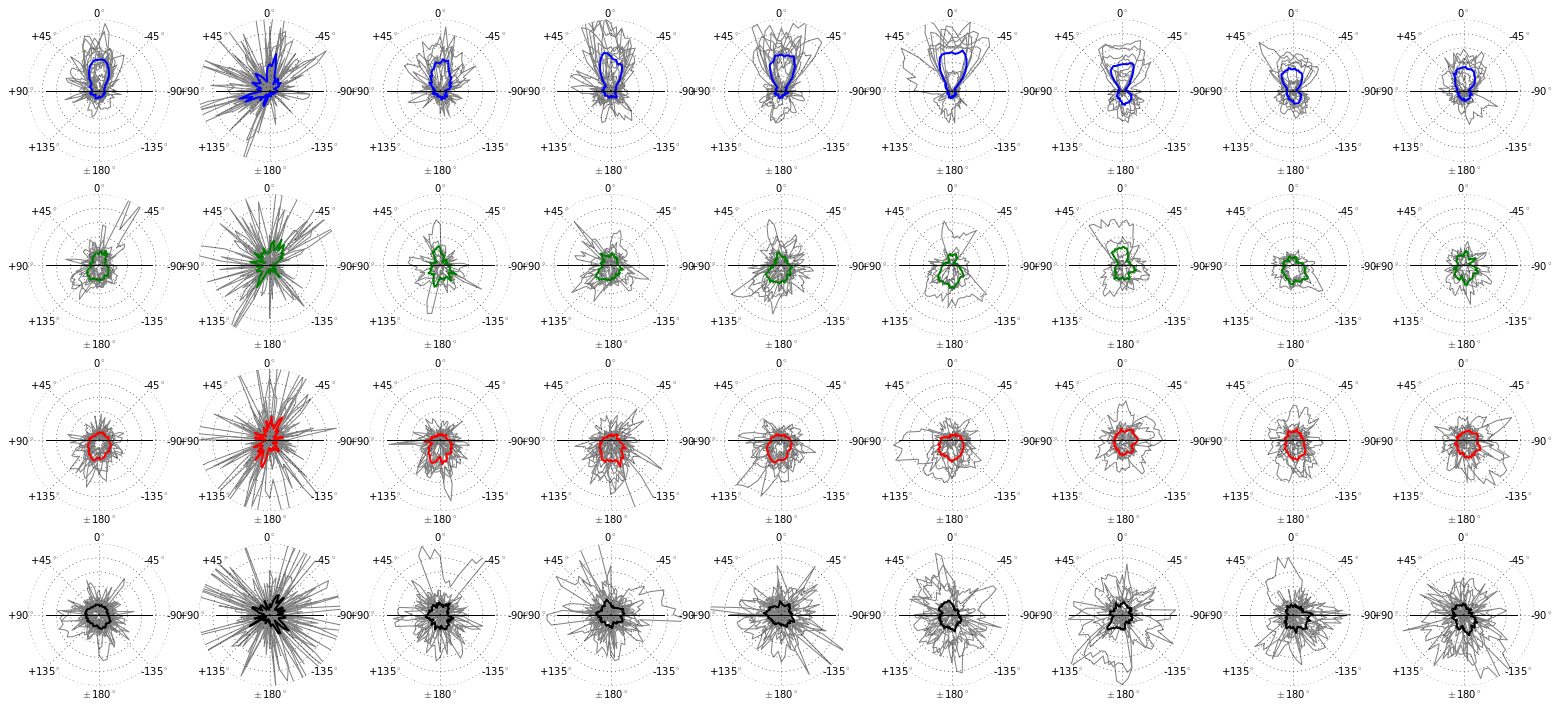

In [3]:
reload(magno)
possible_freq = ['all',0.0,0.2,0.5,1.0,2.0,4.0,6.0,8.0]
shape = ['bar','mbar','spot','blank']
c = 'bgrk'
f,ax = plt.subplots(4,len(possible_freq),subplot_kw=dict(polar=True))
f.set_size_inches([3*len(possible_freq),12])
for i in range(len(shape)):
    for j in range(len(possible_freq)):
        deg = 60
        if possible_freq[j] == 0:
            deg = 0
        avgavg, avghist = magno.hist_avgavg(fly,shape=shape[i],freq=possible_freq[j],ax=ax[i,j],c=c[i])
        ax[i,j].plot([0,np.pi],[0.75,0.75],c='k')
f.savefig('20150701_rose-freq.pdf')

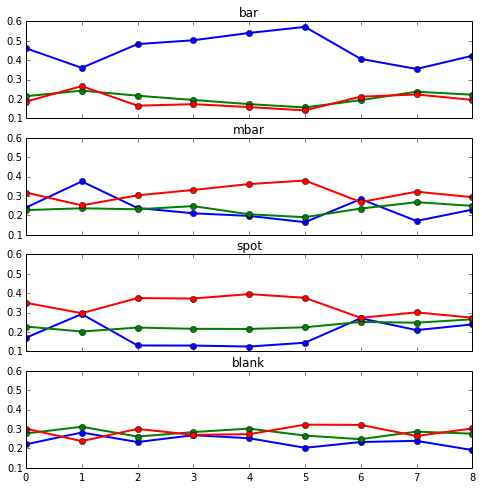

In [8]:
possible_freq = ['all',0.0,0.2,0.5,1.0,2.0,4.0,6.0,8.0]
shape = ['bar','mbar','spot','blank']
c = 'bgrk'

f,ax = plt.subplots(len(shape),sharex=True,sharey=True)
f.set_size_inches([8,8])

for i in range(len(shape)):
    fix = np.empty(len(possible_freq))
    side = np.empty(len(possible_freq))
    antifix = np.empty(len(possible_freq))
    for j in range(len(possible_freq)):
        avgavg, avghist = magno.hist_avgavg(fly,shape=shape[i],freq=possible_freq[j],nbin=6,plot=False)
        fix[j] = avgavg[2]+avgavg[3]
        side[j] = avgavg[1]+avgavg[4]
        antifix[j] = avgavg[0]+avgavg[5]
    ax[i].plot(fix,'-o',c='b',lw=2)
    ax[i].plot(side,'-o',c='g',lw=2)
    ax[i].plot(antifix,'-o',c='r',lw=2)
    ax[i].set_title(shape[i])

In [5]:
avghist

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  8.27605704e-03,   6.36619772e-03,   1.97352129e-02,
          4.60276095e-01,   1.63611281e-01,   2.96664814e-01,
          8.27605704e-03],
       [  2.76286665e-01,   1.52161450e-01,   7.75641933e-02,
          3.09409077e-02,   2.38496175e-01,   1.79480267e-01,
          2.76286665e-01],
       [  2.12053284e-01,   8.01532385e-02,   1.64771706e-01,
          1.32961077e-01,   1.23065736e-01,   2.41924617e-01,
          2.12053284e-01],
       [  1.00880796e-01,   1.61589305e-01,   2.50768397e-01,
          1.37416475e-01,   1.83129254e-01,   1.21145431e-01,
          1.00880796e-01],
       [  1.05851001e-01,   1.49549368e-01,   1.06834525e-01,
          1.87365564e-01,   2.72

In [24]:
sum((avgavg/sum(avgavg*2*np.pi/72))*2*np.pi/72)

0.99999999999999978

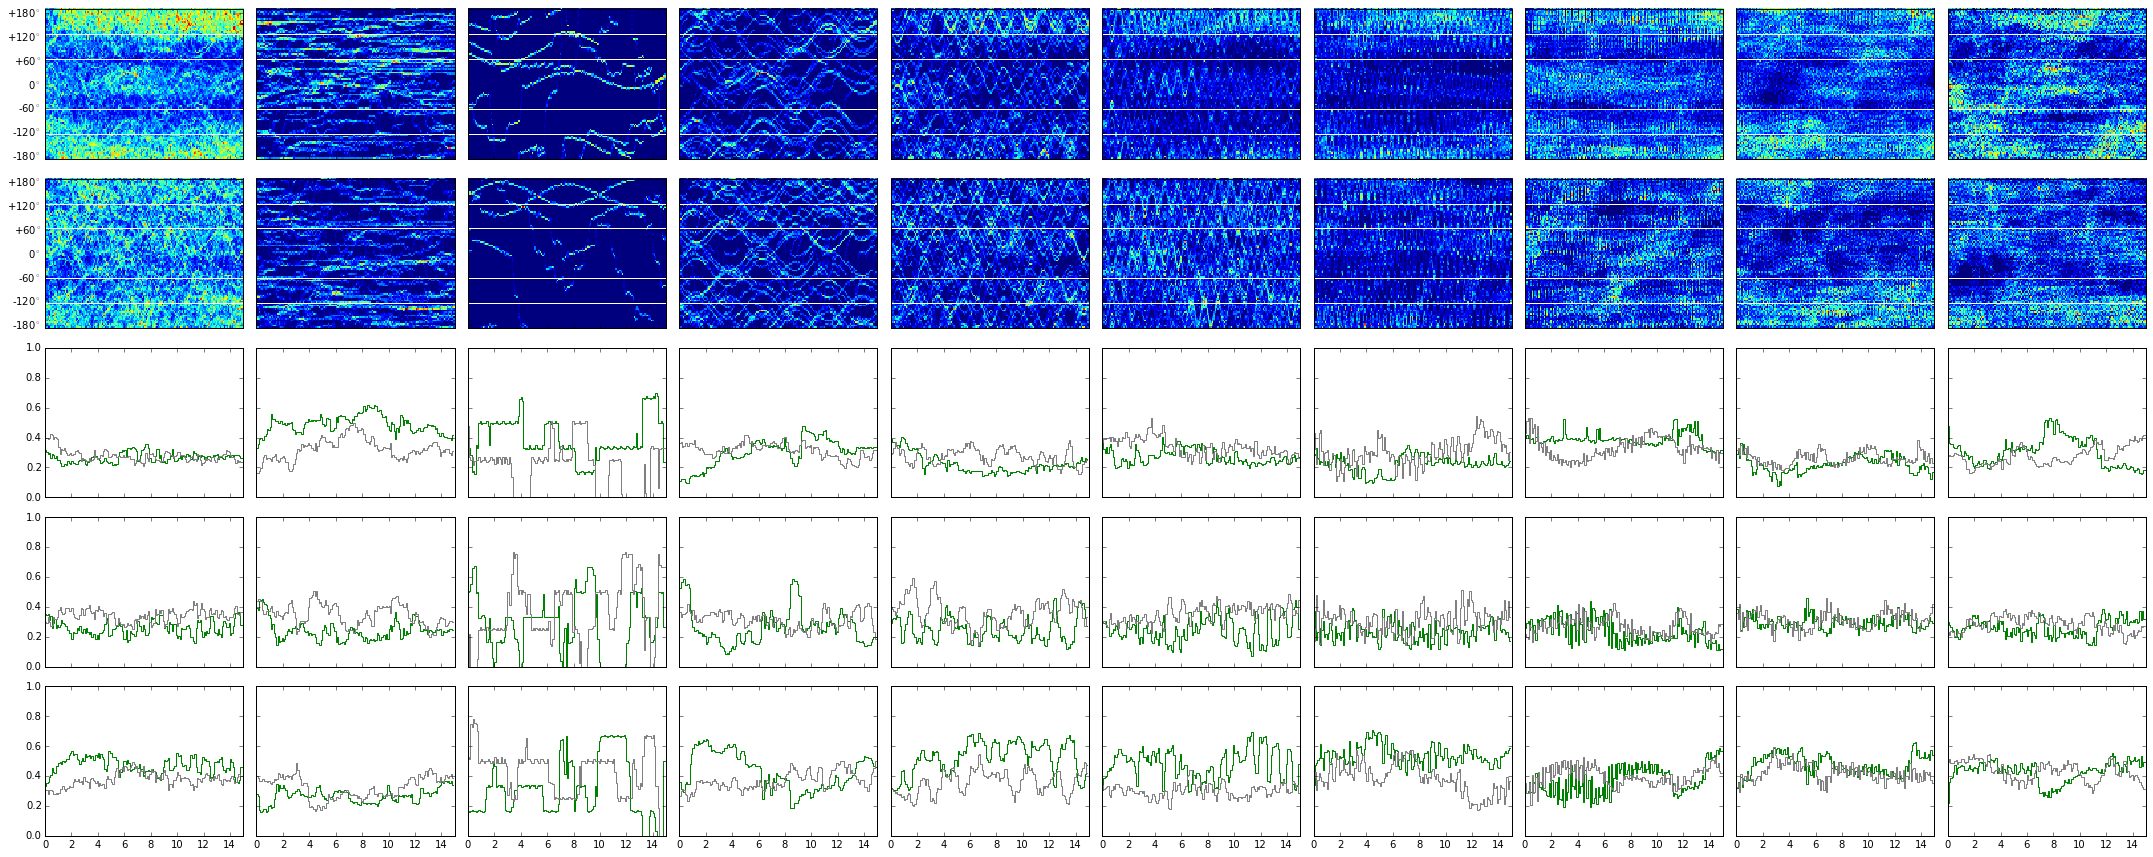

In [31]:
tstep = 0.1
thres = np.pi/3
possible_freq = ['all',0.0,0.1,0.2,0.5,1.0,2.0,4.0,6.0,8.0]
#stdthres = [0.5,1,1.5]
#linestyles = ['-','--',':']
f,ax = plt.subplots(5,len(possible_freq),sharex=True,sharey='row')
f.set_size_inches([3*len(possible_freq),12])
for i in range(len(possible_freq)):
    fr = possible_freq[i]
    d = 60
    if fr == 0: d = 0
    _,_ = magno.hist2d_time(fly,'mbar',freq=fr,deg=d,ax=ax[0,i])
    _,_ = magno.hist2d_time(fly,'blank',freq=fr,deg=d,ax=ax[1,i])

    bar_fix,bar_neither,bar_antifix,t = hist_segment(fly,shape='mbar',freq=fr,deg=d,tstep=tstep,thres=np.pi/3)
    ax[2,i].plot(t,bar_fix,c='g',drawstyle='steps')
    ax[3,i].plot(t,bar_neither,c='g',drawstyle='steps')
    ax[4,i].plot(t,bar_antifix,c='g',drawstyle='steps')
    ax[0,i].axhline(-np.pi+thres,c='w')
    ax[0,i].axhline(-thres,c='w')
    ax[0,i].axhline(thres,c='w')
    ax[0,i].axhline(np.pi-thres,c='w')

    bla_fix,bla_neither,bla_antifix,t = hist_segment(fly,shape='blank',freq=fr,deg=d,tstep=tstep,thres=np.pi/3)
    ax[2,i].plot(t,bla_fix,c='0.5',drawstyle='steps')
    ax[3,i].plot(t,bla_neither,c='0.5',drawstyle='steps')
    ax[4,i].plot(t,bla_antifix,c='0.5',drawstyle='steps')
    ax[1,i].axhline(-np.pi+thres,c='w')
    ax[1,i].axhline(-thres,c='w')
    ax[1,i].axhline(thres,c='w')
    ax[1,i].axhline(np.pi-thres,c='w')
    
    
ax[2,0].set_ylim([0,1])
ax[3,0].set_ylim([0,1])
ax[4,0].set_ylim([0,1])
ax[0,0].set_yticklabels(['-180$^\circ$','-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$'])
ax[1,0].set_yticklabels(['-180$^\circ$','-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$'])
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           #ncol=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.savefig('offset-time-latency-mbar_20150625.pdf')

In [25]:
allcont = np.concatenate([f.contour for f in fly])
cid = np.unique([c.id for c in allcont])

def plot_contour(allcont,contid):
    ctoplot = magno.contour_parse(allcont,contid)
    if len(ctoplot) > 3:
        ax0 = plt.subplot2grid((1,4),(0,0))
        ax1 = plt.subplot2grid((1,4),(0,1),colspan=3)
        ax1.set_ylim(-180,180)
        magno.id_contour(contid,ax0)
        t = [c.t for c in ctoplot]
        t = [item for sublist in t for item in sublist]
        offset = [c.offset for c in ctoplot]
        offset = [item for sublist in offset for item in sublist]
        ax1.hist2d(t,offset,bins=[150,90],range=[[0,15],[-180,180]])
        
def plot_contour_rose(allcont,contid):
    ctoplot = magno.contour_parse(allcont,contid)
    if len(ctoplot) > 3:
        ax0 = plt.subplot2grid((1,3),(0,0))
        ax1 = plt.subplot2grid((1,3),(0,1),colspan=2,polar=True)
        magno.id_contour(contid,ax0)
        for c in ctoplot:
            rad = np.radians(c.offset)
            hist = np.histogram(rad,72,(-np.pi,np.pi),density=True)
            pad = np.append(hist[0],[hist[0][0]])
            ax1.set_xticklabels(['-90$^\circ$','-45$^\circ$','0$^\circ$','+45$^\circ$','+90$^\circ$','+135$^\circ$','$\pm$180$^\circ$','-135$^\circ$'])
            ax1.set_yticklabels([''])
            ax1.plot(hist[1]+np.pi/2,pad)
            ax1.plot([c.offset[0]+np.pi/2,c.offset[0]+np.pi/2],[0,0.7])

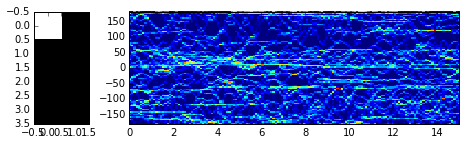

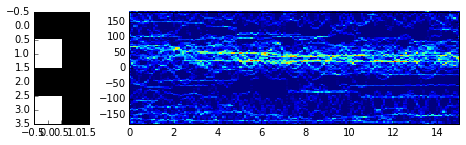

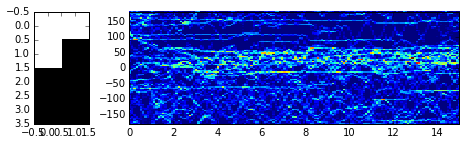

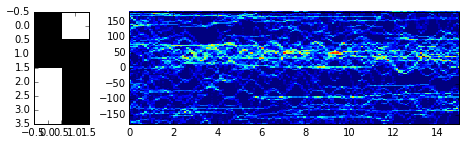

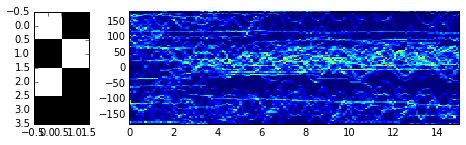

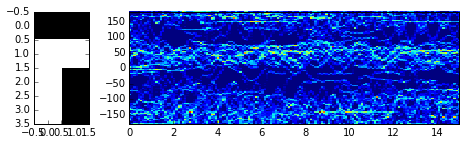

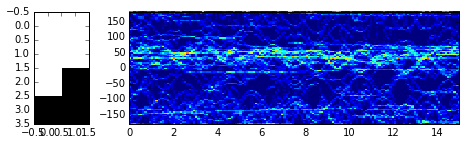

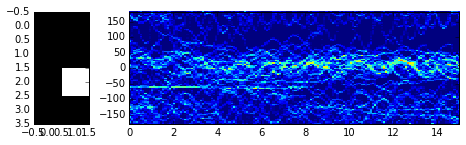

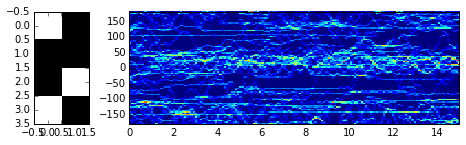

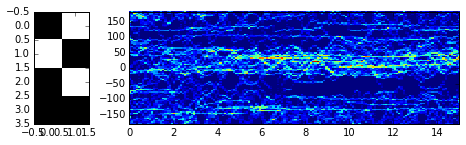

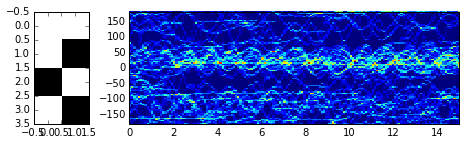

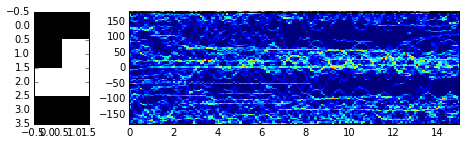

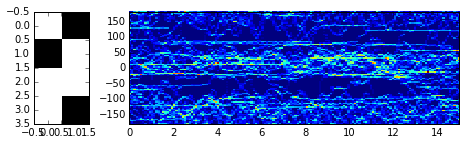

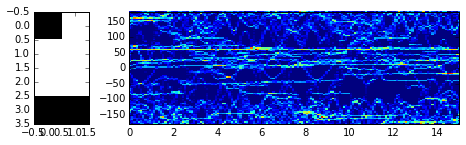

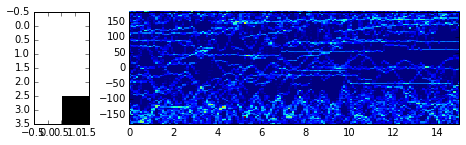

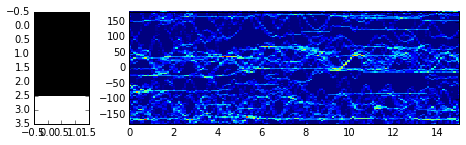

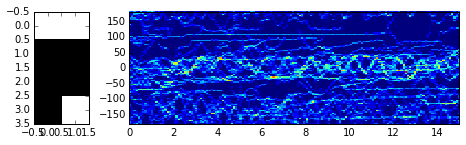

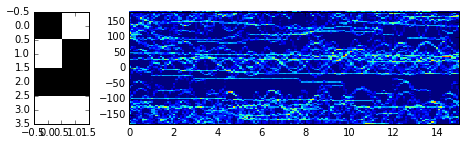

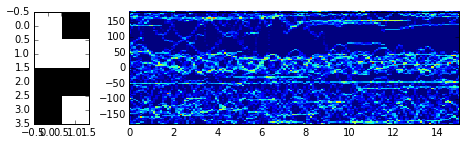

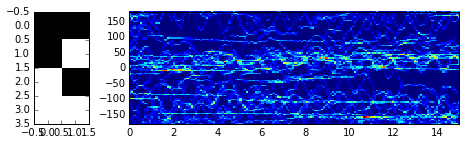

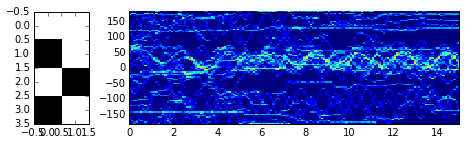

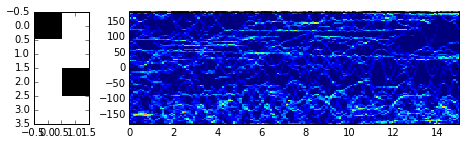

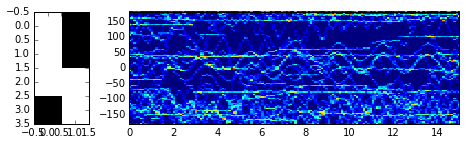

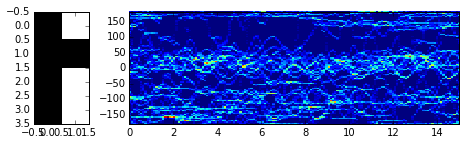

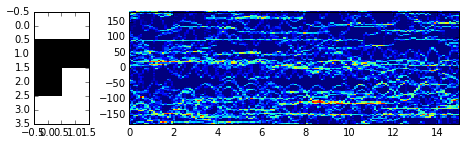

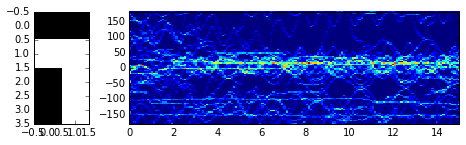

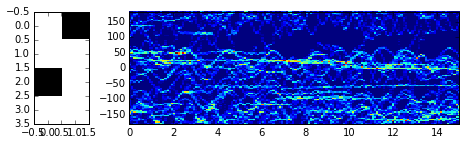

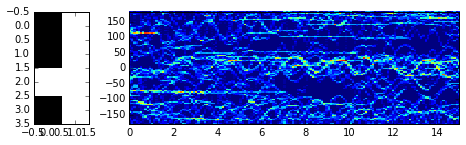

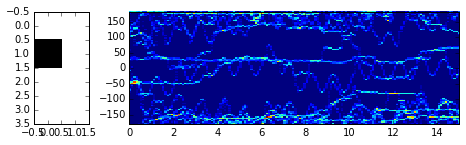

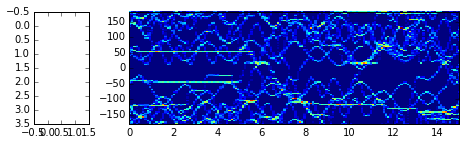

In [26]:
for i in range(len(cid)):
    figure(i+1,[8,2])
    plot_contour(allcont,cid[i])
    show()

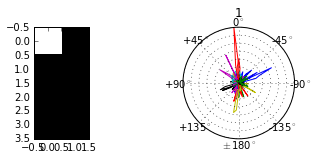

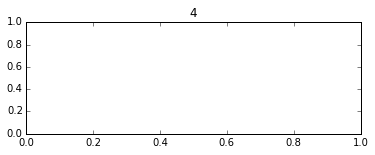

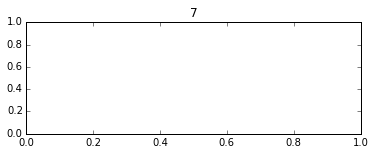

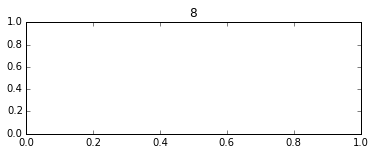

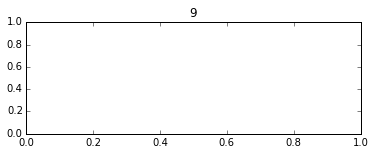

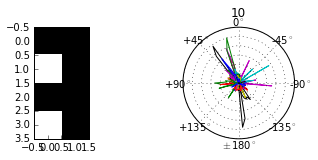

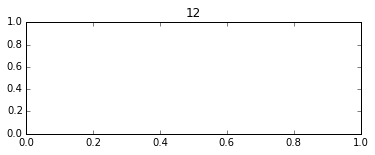

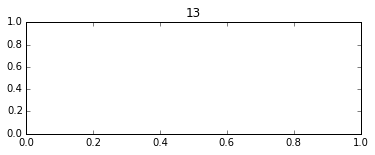

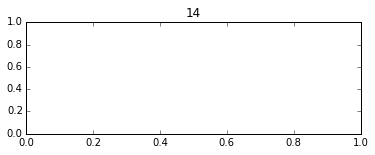

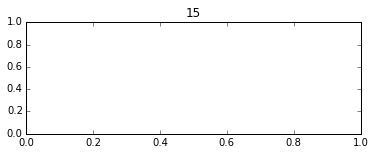

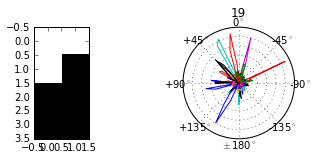

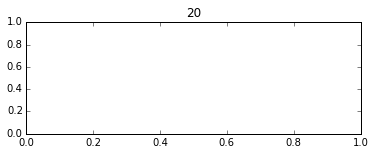

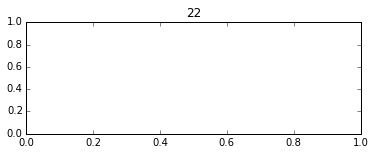

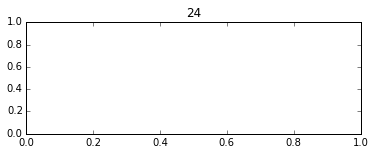

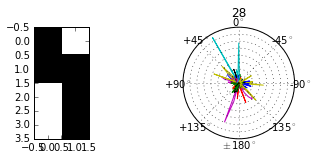

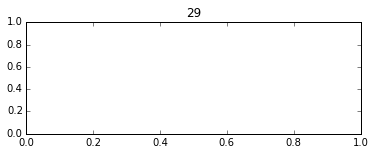

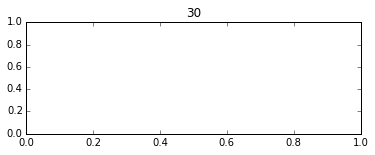

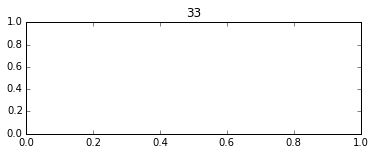

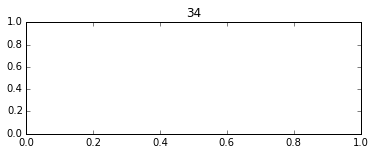

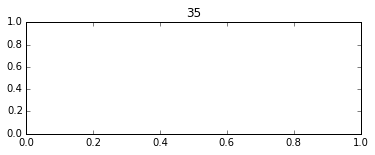

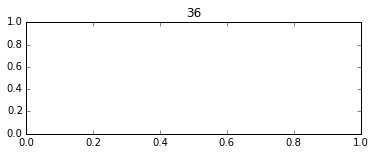

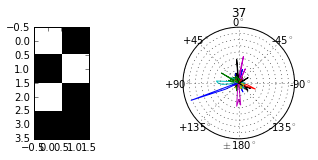

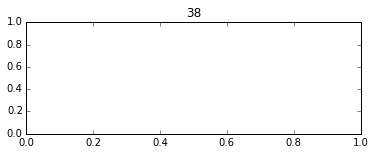

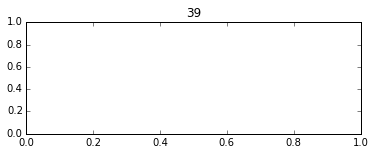

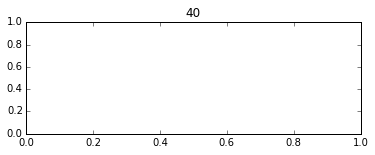

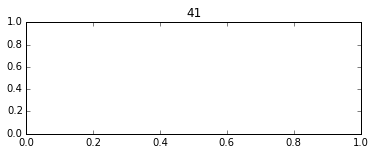

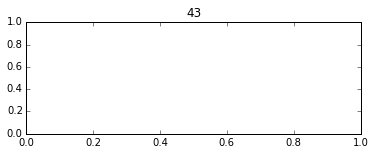

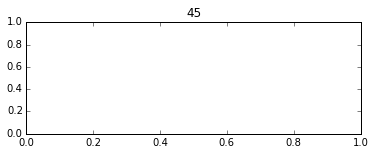

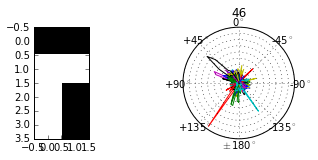

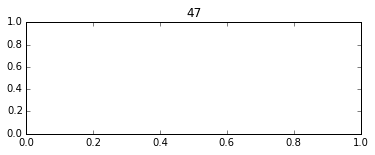

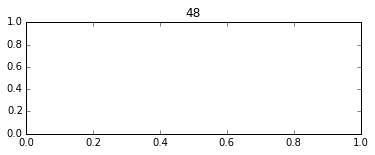

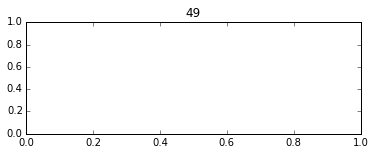

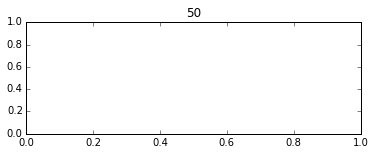

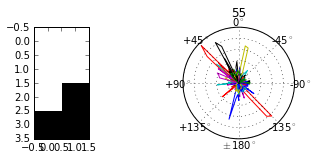

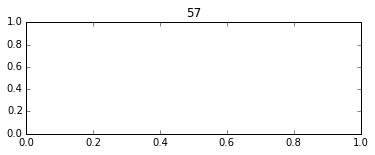

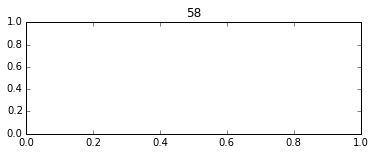

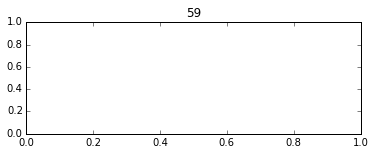

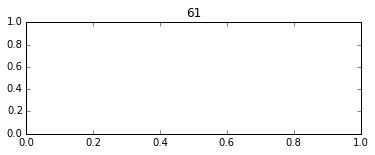

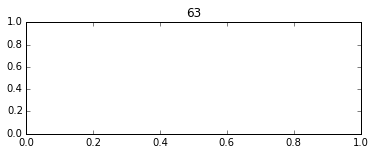

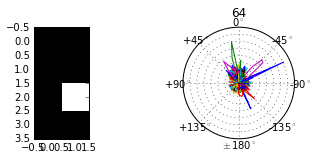

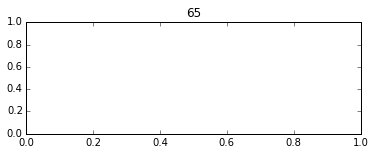

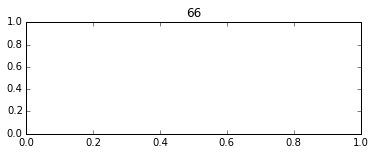

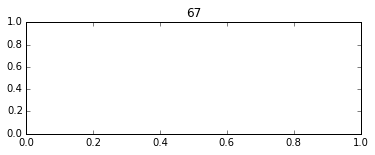

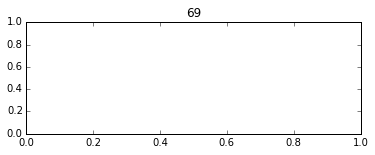

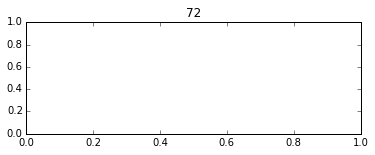

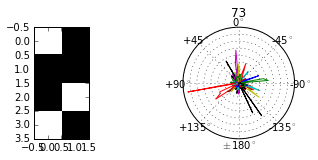

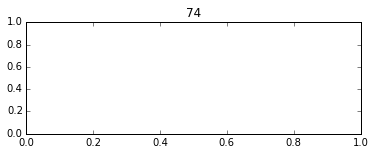

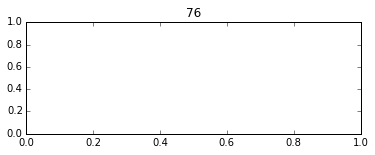

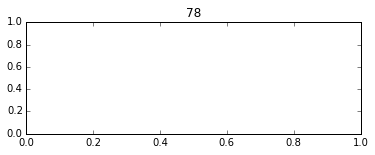

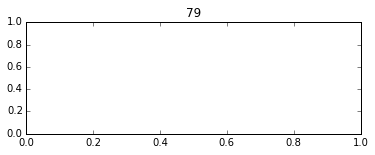

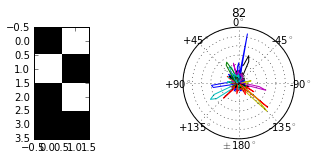

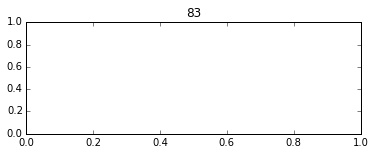

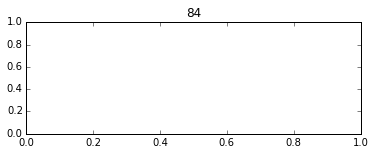

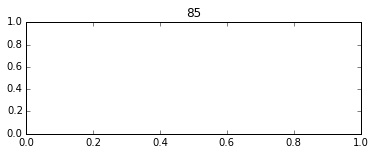

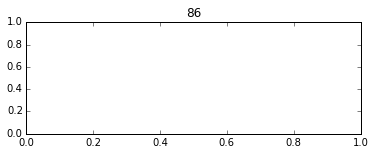

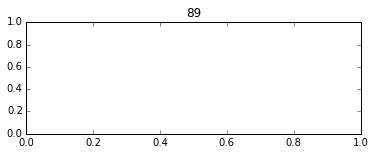

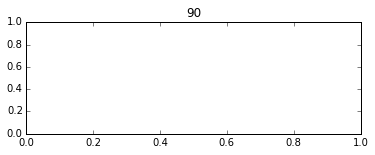

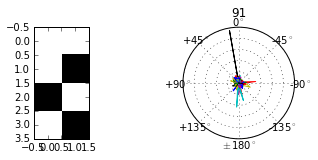

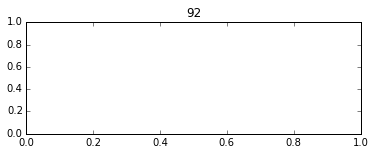

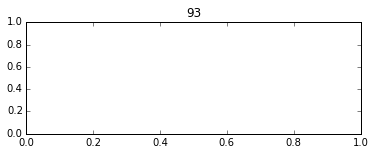

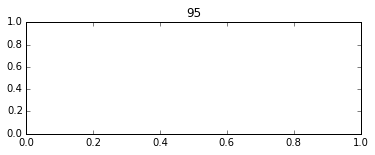

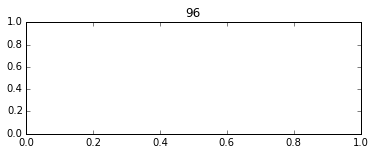

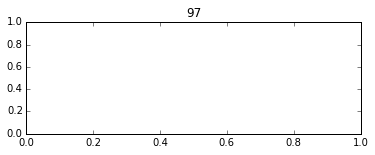

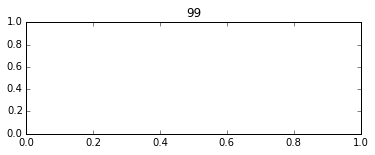

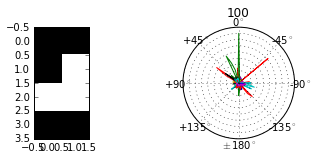

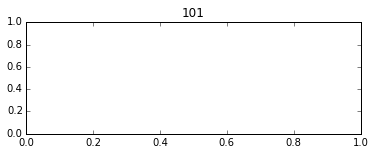

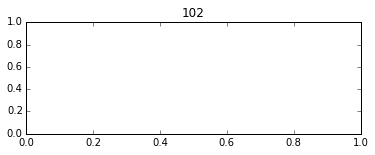

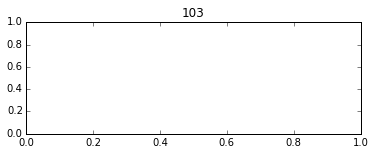

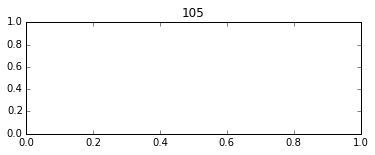

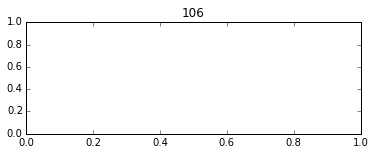

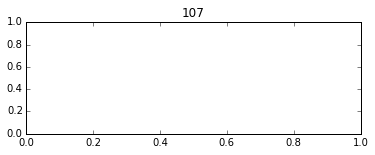

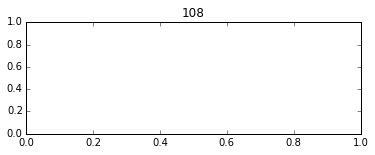

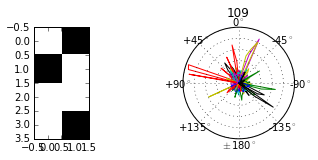

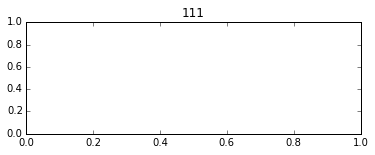

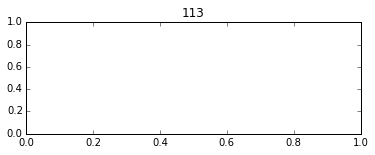

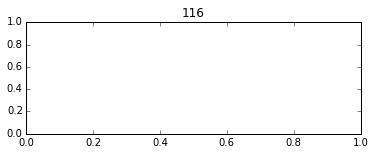

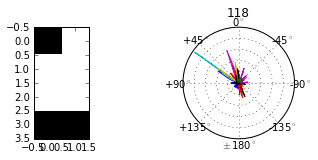

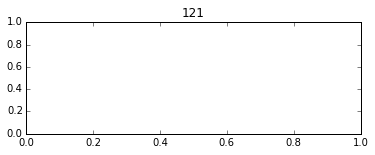

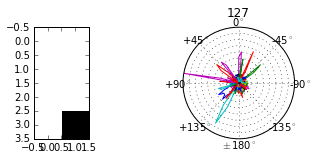

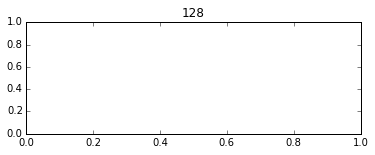

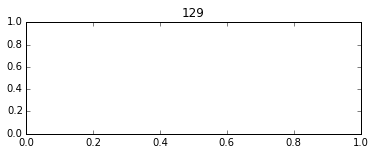

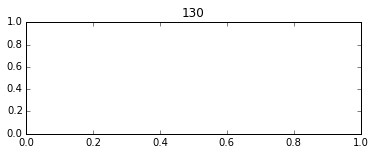

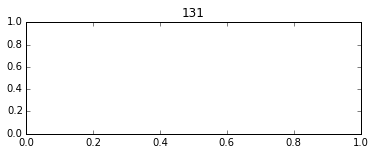

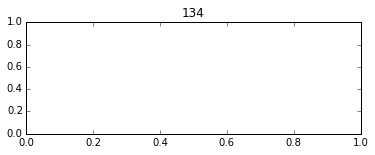

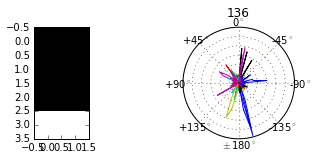

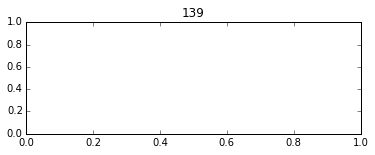

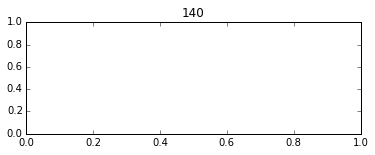

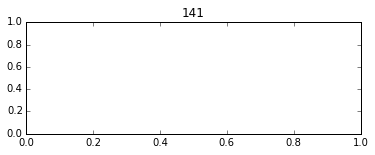

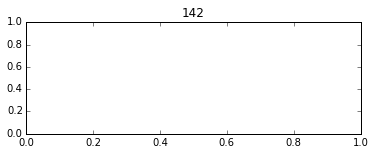

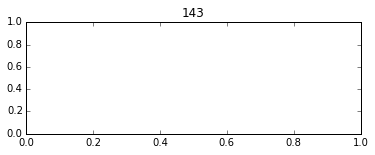

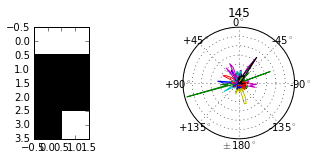

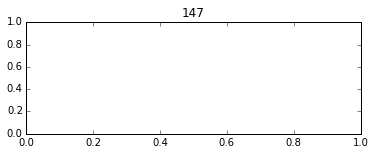

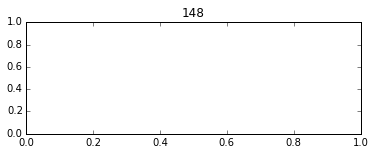

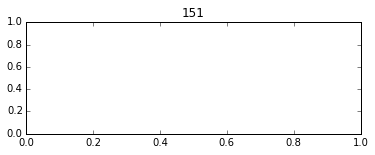

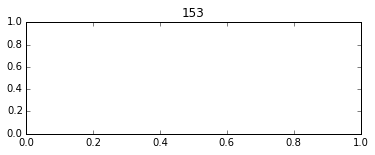

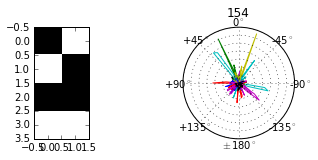

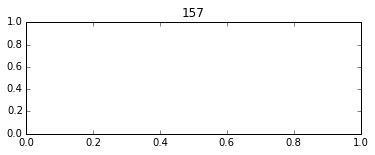

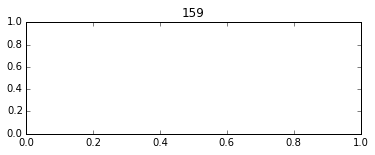

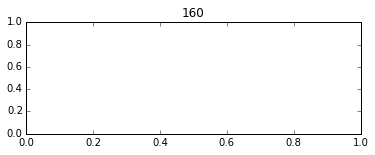

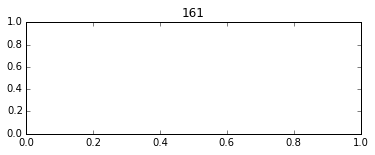

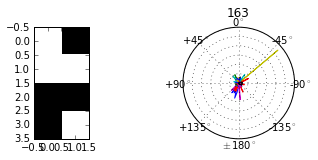

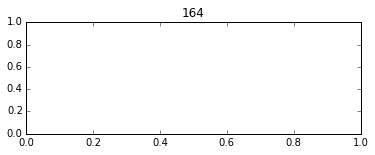

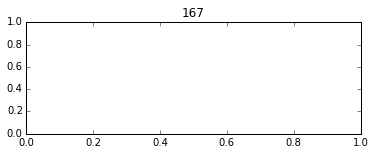

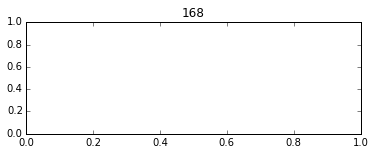

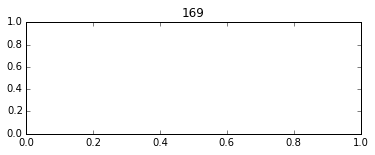

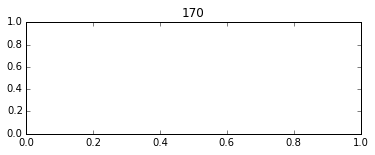

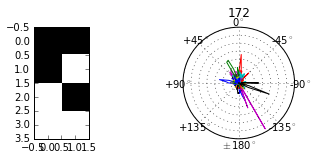

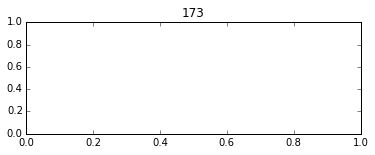

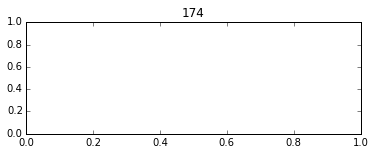

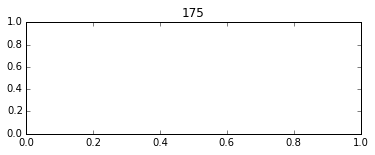

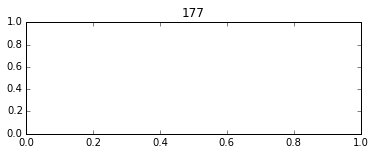

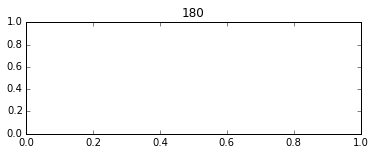

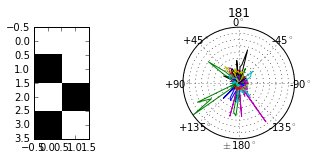

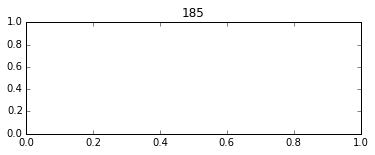

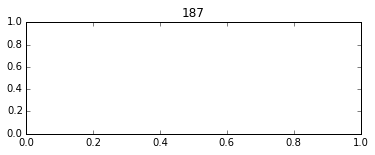

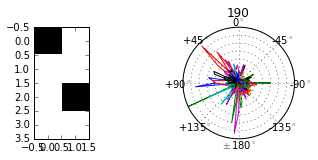

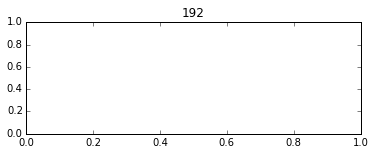

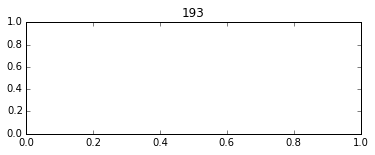

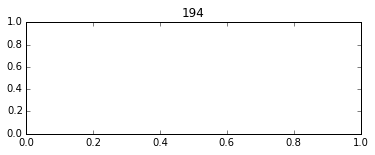

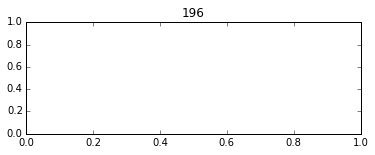

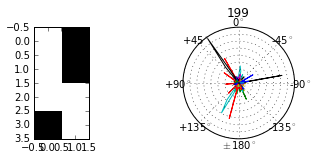

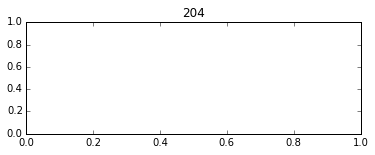

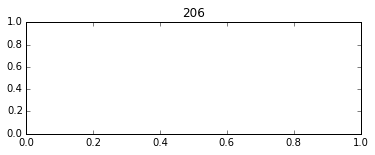

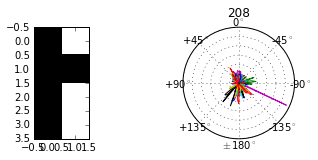

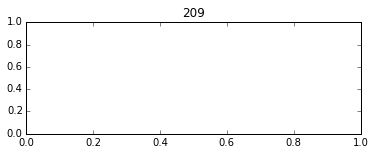

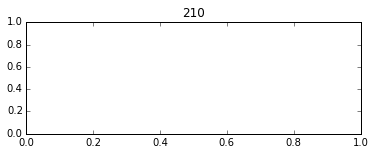

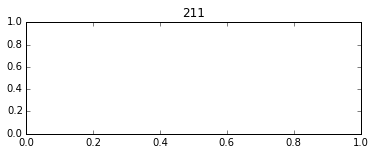

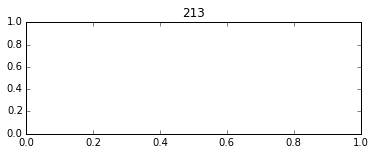

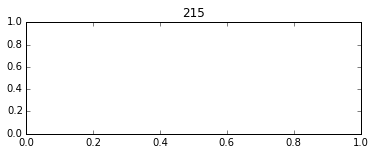

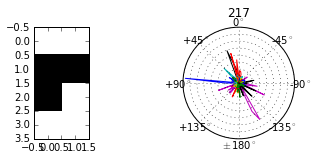

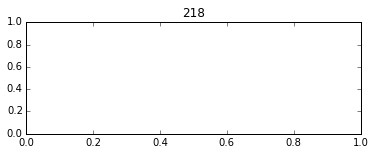

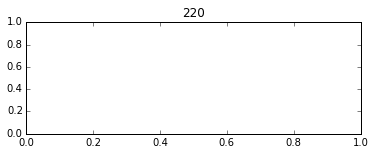

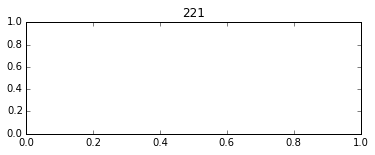

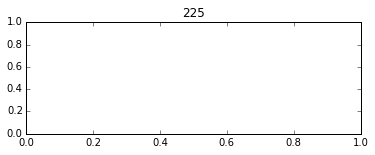

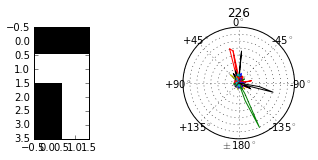

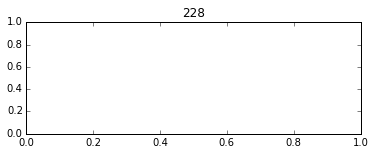

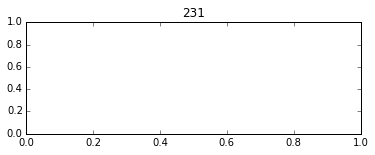

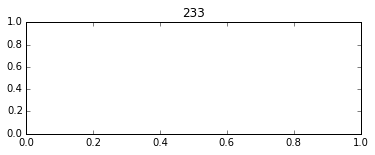

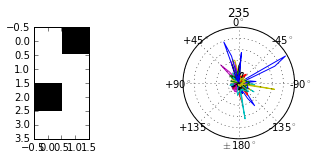

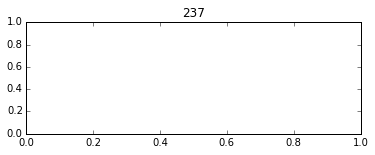

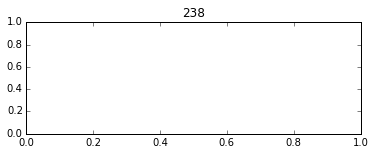

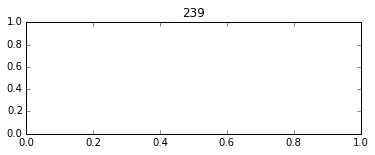

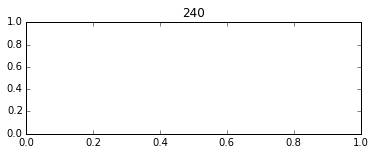

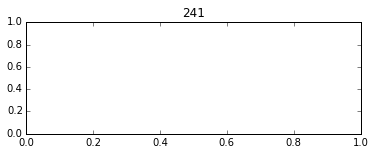

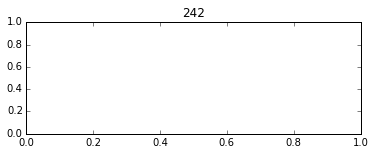

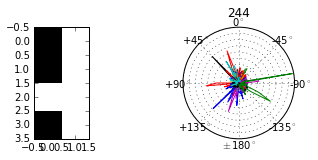

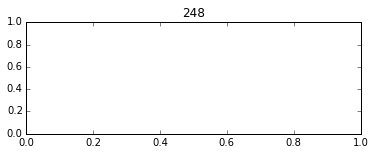

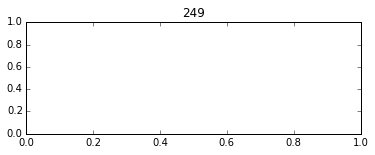

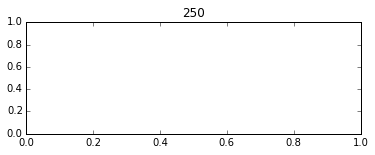

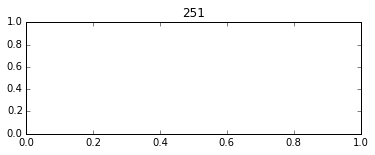

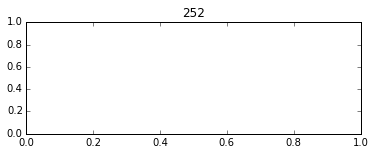

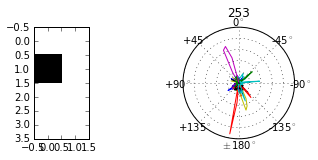

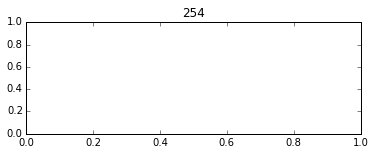

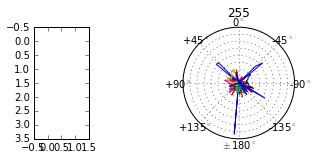

In [27]:
for i in range(len(cid)):
    figure(i+1,[6,2])
    plot_contour_rose(allcont,cid[i])
    title(str(cid[i]))
    show()

In [15]:
cid = np.unique([c.id for c in fly[-1].contour])

In [16]:
cid

array([  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108,
       117, 126, 135, 144, 153, 162, 171, 180, 189, 198, 207, 216, 225,
       234, 243, 251, 252])

In [22]:
nbin = 72
f,ax = plt.subplots(len(cid),subplot_kw=dict(polar=True))
f.set_size_inches(3*len(cid),3)

for i in range(len(cid)):
    avghist = np.empty([len(fly),nbin+1])
    magno.id_contour(cid[i],ax[i,0])
    for f in fly:
        contours = [ c for c in f.contour if c.id == cid[i] ]
        avghist[i] = magno.hist_avg(contours,nbin=nbin,ax=ax[i,1])
    avgavg = np.nanmean(avghist,axis=0)
    stepsize = 2*np.pi/nbin
    steps = np.arange(-np.pi,np.pi+stepsize,stepsize)
    ax[i,1].plot

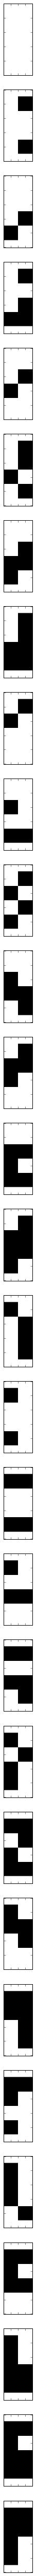

In [27]:
f,ax = plt.subplots(len(cid),sharex=True,sharey=True)
f.set_size_inches(1,3*len(cid))

for i in range(len(cid)):
    magno.id_contour(cid[i],ax[i])
    ax[i].set_xticklabels([''])
    ax[i].set_yticklabels([''])
    ax[i].set_ylim([-0.5,3.5])
plt.savefig('20150619_contours.pdf')

In [6]:
len(fly[14].shape)

99

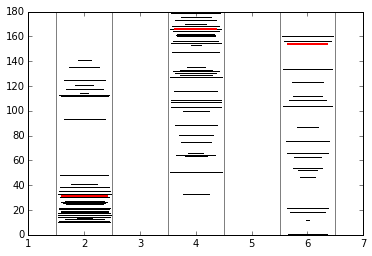

In [20]:
baroff = []
spotoff = []
blankoff = []
for s in fly[21].shape:
    if s.shape == 'bar':
        x = 2
        baroff.append(np.radians(s.offset))
    elif s.shape == 'spot':
        x = 4
        spotoff.append(np.radians(s.offset))
    elif s.shape == 'blank':
        x = 6
        blankoff.append(np.radians(s.offset))
    theta_mean, R = circular.mean(s.offset,radian=False)
    plot([x-R/2,x+R/2],[abs(theta_mean),abs(theta_mean)],c='k')

bar,_,R_b = circular.pool_mean(baroff)
spot,_,R_s = circular.pool_mean(spotoff)
blank,_,R_bl = circular.pool_mean(blankoff)

plot([2-R_b/2,2+R_b/2],[abs(np.degrees(bar)),abs(np.degrees(bar))],c='r',lw=2)
plot([4-R_s/2,4+R_s/2],[abs(np.degrees(spot)),abs(np.degrees(spot))],c='r',lw=2)
plot([6-R_bl/2,6+R_bl/2],[abs(np.degrees(blank)),abs(np.degrees(blank))],c='r',lw=2)
    
bounds = [1.5,2.5,3.5,4.5,5.5,6.5]
for b in bounds:
    axvline(b,c='0.5')

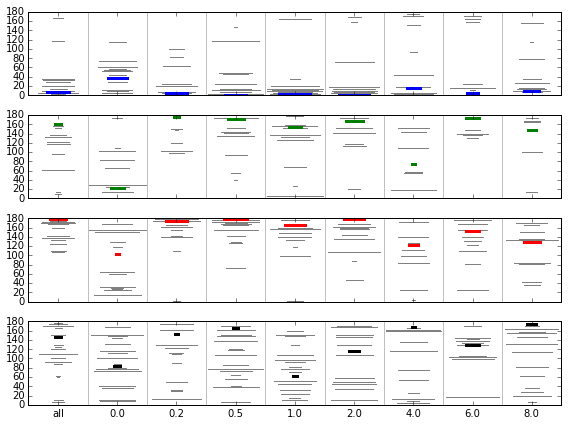

In [31]:
reload(circular)
freq = ['all',0.0,0.2,0.5,1.0,2.0,4.0,6.0,8.0]
shape = ['bar','mbar','spot','blank']
color = 'bgrk'

# let's try to make a plot of all the frequency stuff
ticks = np.arange(0.5,0.5+1*len(freq),1)
lowb = np.arange(0,1*(len(freq)+1),1)

f,ax = plt.subplots(4,sharex=True,sharey=True)
f.set_size_inches(8,6)

for j in range(len(shape)):
    for i in range(len(freq)):
        alloff = []
        for f in fly:
            deg = 60
            if freq[i] == 0:
                deg = 0
            elif freq[i] == 'all':
                deg = 'all'
            ctoplot = magno.shape_parse(f.shape,shape[j],freq=freq[i],deg=deg)
            if len(ctoplot) > 0:
                coff = [ np.radians(c.offset) for c in ctoplot ]
                alloff.append(coff)
                theta_mean, p = circular.pool_mean(coff)
                ax[j].plot([ticks[i]-p/2,ticks[i]+p/2],[abs(np.degrees(theta_mean)),abs(np.degrees(theta_mean))],c='0.5')
            ax[j].axvline(lowb[i],c='0.75')
        all_mean, R = circular.pool_pool_mean(alloff)
        ax[j].plot([ticks[i]-R/2,ticks[i]+R/2],[abs(np.degrees(all_mean)),abs(np.degrees(all_mean))],c=color[j],lw=3)
        
        #listmean.append(all_mean)
    
ax[3].set_xticks(ticks)
ax[3].set_xlim(lowb[0],lowb[-1])
_ = ax[3].set_xticklabels(freq)
    
#for b in lowb:
#    ax.axvline(b,ls='--',c='0.25')
#for b in upb:
#    ax.axvline(b,ls='--',c='0.25')

plt.tight_layout()
plt.savefig('20150629_freqtuning.pdf')

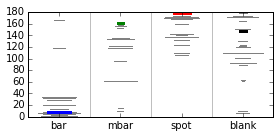

In [30]:
shape = ['bar','mbar','spot','blank']
color = 'bgrk'

# let's try to make a plot of all the frequency stuff
ticks = np.arange(0.5,0.5+1*len(shape),1)
lowb = np.arange(0,1*(len(shape)+1),1)
#upb = np.arange(1,1+1.1*len(shape),1.1)

f,ax = plt.subplots(1)
f.set_size_inches(4,2)

for j in range(len(shape)):
    alloff = []
    for f in fly:
        ctoplot = magno.shape_parse(f.shape,shape[j])
        if len(ctoplot) > 0:
            coff = [ np.radians(c.offset) for c in ctoplot ]
            alloff.append(coff)
            theta_mean, p = circular.pool_mean(coff)
            ax.plot([ticks[j]-p/2,ticks[j]+p/2],[abs(np.degrees(theta_mean)),abs(np.degrees(theta_mean))],c='0.5')
    all_mean, R = circular.pool_pool_mean(alloff)
    ax.plot([ticks[j]-R/2,ticks[j]+R/2],[abs(np.degrees(all_mean)),abs(np.degrees(all_mean))],c=color[j],lw=3)
    ax.axvline(lowb[j],c='0.75')
    #listmean.append(all_mean)
    
ax.set_xticks(ticks)
ax.set_xlim(lowb[0],lowb[-1])
_ = ax.set_xticklabels(shape)
    
#for b in lowb:
#    ax.axvline(b,ls='--',c='0.25')
#for b in upb:
#    ax.axvline(b,ls='--',c='0.25')

plt.tight_layout()
plt.savefig('20150626_meanshape.pdf')